# Esercizio
Sul database titanic, effettuiamo le seguenti analisi: 
* Quanti ponti c'erano sulla nave?
* Visualizzare un grafico con il numero di passeggeri di ogni classe di imbarco
* Fare la stessa cosa per la colonna alive
* Qual era la distribuzione delle tariffe (fare)?
* Riusciamo a vedere la distribuzione delle età dei passeggeri rispetto alla classe di imbarco? Proviamo con un boxplot e con un violinplot
* Visualizziamo un boxplot rispetto alle colonne fare e survived; che cose ne deduciamo?

In [1]:
from sqlalchemy import create_engine
import dotenv
import os
import pandas as pd
dotenv.load_dotenv(override=True)
username = os.getenv('username')
password = os.getenv('password')
host = os.getenv('host')
dbname = os.getenv('dbname')


dbname = "Titanic"
conn_string = f"mysql+pymysql://{username}:{password}@{host}/{dbname}"
db_engine = create_engine(conn_string)
query = """SELECT *
        FROM titanic
        """
dft = pd.read_sql(query, db_engine)
dft

,PassengerId,PClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,EmbarkDate
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,,S,0,10-4-1912
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C,1,11-4-1912
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.93,,S,1,10-4-1912
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S,1,10-4-1912
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,,S,0,10-4-1912
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.05,,S,0,10-4-1912
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.90,C105,C,1,11-4-1912
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,,S,0,10-4-1912
1307,1308,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.05,,S,0,10-4-1912


In [2]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   PClass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        1309 non-null   object 
 10  Embarked     1309 non-null   object 
 11  Survived     1309 non-null   int64  
 12  EmbarkDate   1309 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 133.1+ KB


In [3]:
dft.columns

Index(['PassengerId', 'PClass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived', 'EmbarkDate'],
      dtype='object')

In [4]:
dft.describe()

,PassengerId,PClass,Age,SibSp,Parch,Fare,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,2.294882,23.877517,0.498854,0.385027,33.270825,0.372804
std,378.020061,0.837836,17.590845,1.041658,0.865560,51.747086,0.483735
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,7.000000,0.000000,0.000000,7.900000,0.000000
50%,655.000000,3.000000,24.000000,0.000000,0.000000,14.450000,0.000000
75%,982.000000,3.000000,35.000000,1.000000,0.000000,31.280000,1.000000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.330000,1.000000


In [5]:
dft.nunique()

PassengerId    1309
PClass            3
Name           1307
Sex               2
Age              99
SibSp             7
Parch             8
Ticket          929
Fare            263
Cabin           187
Embarked          4
Survived          2
EmbarkDate        3
dtype: int64

In [6]:
print('i ponti della nave sono:',dft.Parch.nunique())

i ponti della nave sono: 8


In [7]:
dft.PClass.value_counts()

PClass
3    709
1    323
2    277
Name: count, dtype: int64

<Axes: xlabel='PClass', ylabel='count'>

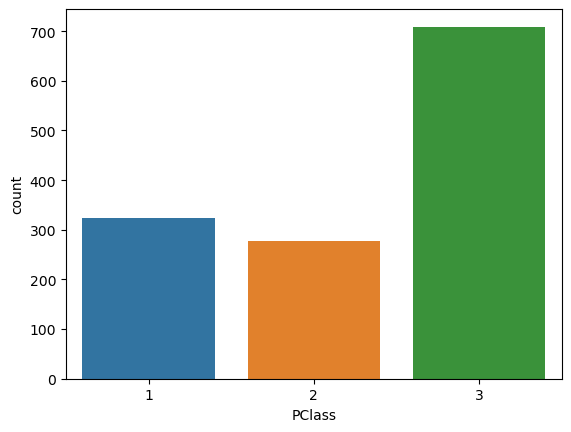

In [8]:
import seaborn as sns  # numero di passeggeri per ogni classe con grafico, la maggioranza sono in terza classe
sns.countplot(data=dft, x="PClass")

<Axes: xlabel='Survived', ylabel='count'>

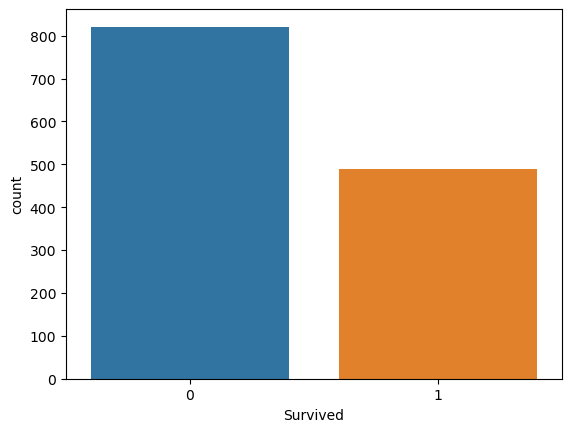

In [9]:
sns.countplot(data=dft, x="Survived") #0 sono i non sopravvissuti che sono maggiori dei sopravvissuti

C:\Users\Ernesto\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Fare', ylabel='Count'>

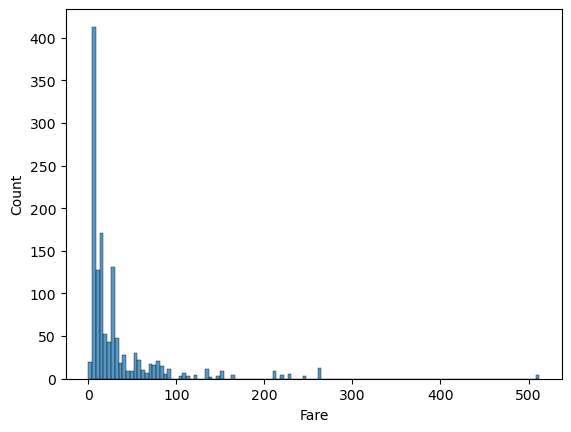

In [10]:
sns.histplot(data=dft, x="Fare") # gran parte delle tariffe è concentrate tra 0 e 50, 
                                 # si nota una grossa concentrazione poco vicino alle zero

<Axes: ylabel='Frequency'>

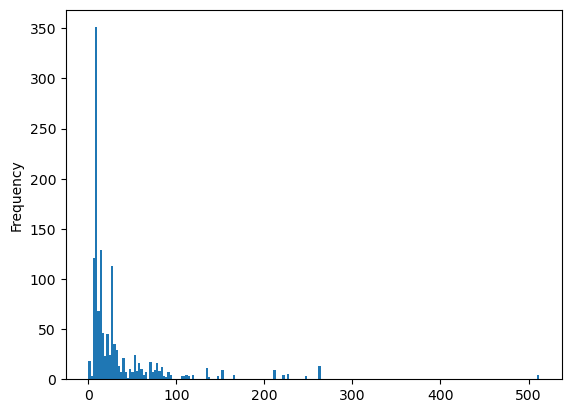

In [11]:
dft.Fare.plot(kind="hist",bins=200) #simile alla libreria Seaborn

C:\Users\Ernesto\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

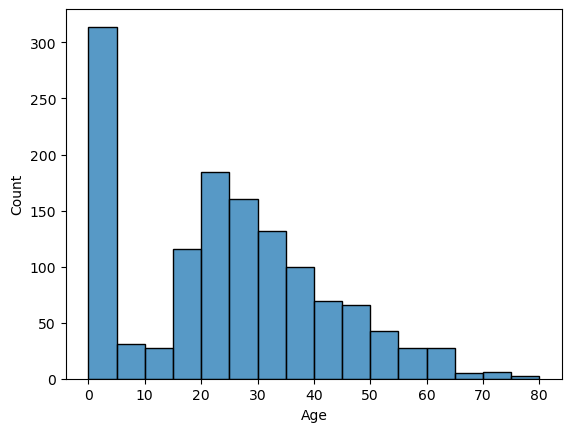

In [12]:
sns.histplot(data=dft, x="Age") # la distribuzione in base all'età evidenza una grossa concetrazione di giovani con un picco dei neonati

<Axes: xlabel='PClass', ylabel='Age'>

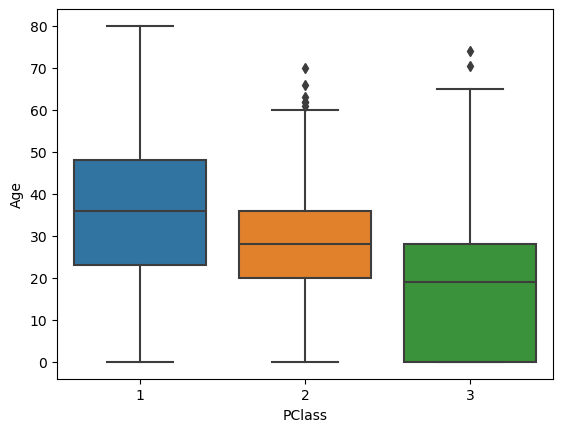

In [13]:
sns.boxplot(data=dft, x="PClass", y="Age") # nella terza classe ci sono i più giovani, 
                                          # mentre nella prima classe la fasce di età era medio/grande

<Axes: xlabel='PClass', ylabel='Age'>

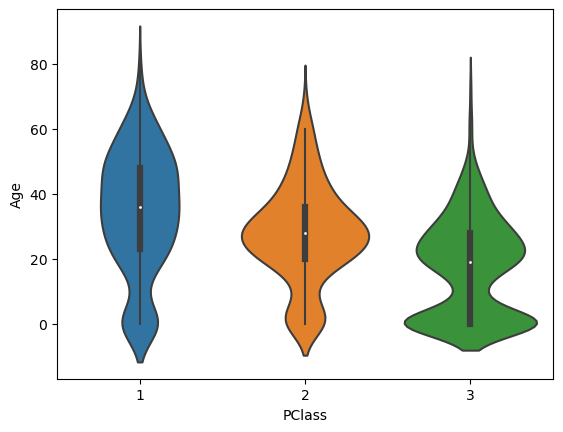

In [14]:
sns.violinplot(data=dft, x="PClass", y="Age")

<Axes: xlabel='Age', ylabel='PClass'>

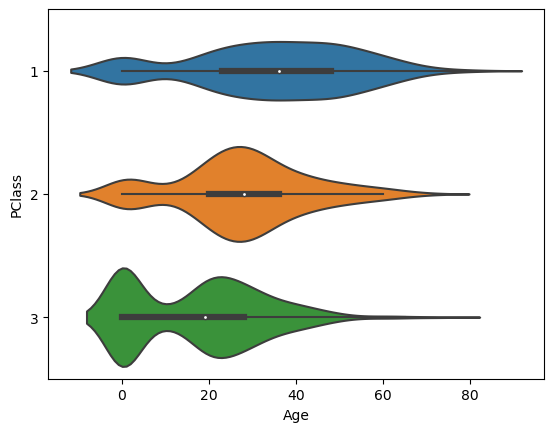

In [15]:
sns.violinplot(data=dft, y="PClass", x="Age", orient="h")

C:\Users\Ernesto\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

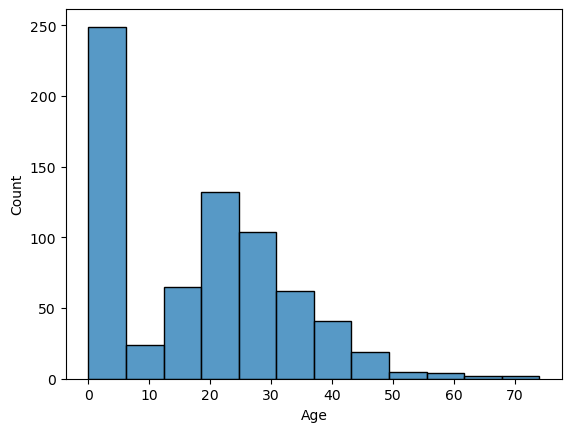

In [16]:
sns.histplot(data=(dft.loc[dft.PClass==3]),x="Age")

<Axes: ylabel='Frequency'>

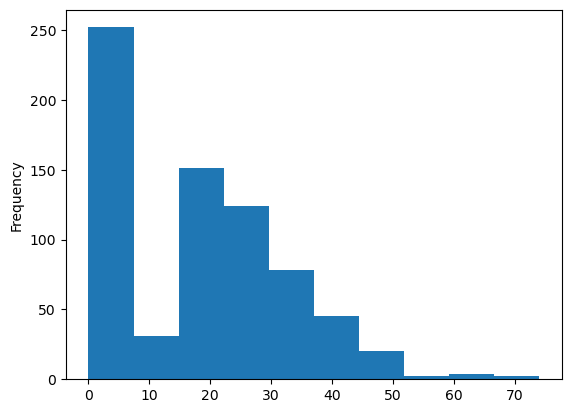

In [17]:
dft.loc[dft.PClass==3].Age.plot(kind="hist")

<Axes: xlabel='Survived', ylabel='Fare'>

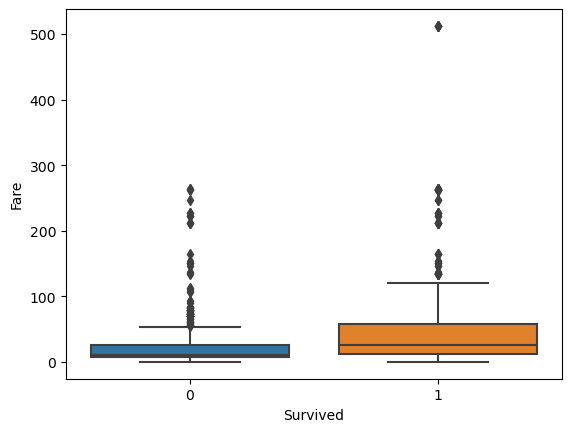

In [18]:
sns.boxplot(data=dft, x="Survived", y="Fare") # Abbiamo una correlazione tra chi ha pagato di più ed 
            # è sopravvisuto la maggior parte dei sopravvissuti sono quelli che hanno pagato in più 

# Esercizio 
Scarichiamo il dataset stockdata.csv da https://github.com/plotly/datasets/blob/master/stockdata.csv e:
* Visualizziamo l'andamento delle azioni della Apple ("AAPL")
* Visualizziamo l'andamento di tutte le azioni del dataset
* Visualizziamo l'andamento di Microsoft ("MSFT") e IBM ("IBM") negli anni 2012 e 2013
* Con un istogramma, troviamo il range di valori che le azioni di Microsoft hanno assunto più spesso

In [19]:
percorso_attuale=os.getcwd()
path="/beginner_datasets/stockdata.csv"
dfs=pd.read_csv(percorso_attuale+path)
dfs=dfs.set_index("Date")
dfs

,MSFT,IBM,SBUX,AAPL,GSPC
Date,,,,,
2007-01-03,23.950705,80.517962,16.149666,11.086612,1416.599976
2007-01-04,23.910599,81.378851,16.167992,11.332687,1418.339966
2007-01-05,23.774242,80.642129,16.099269,11.251984,1409.709961
2007-01-08,24.006852,81.867244,16.039710,11.307550,1412.839966
2007-01-09,24.030914,82.835742,15.970989,12.246870,1412.109985
...,...,...,...,...,...
2016-02-24,51.360001,132.800003,58.110001,96.099998,1929.800049
2016-02-25,52.099998,134.500000,58.750000,96.760002,1951.699951
2016-02-26,51.299999,132.029999,58.340000,96.910004,1948.050049


In [20]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2306 entries, 2007-01-03 to 2016-03-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MSFT    2306 non-null   float64
 1   IBM     2306 non-null   float64
 2   SBUX    2306 non-null   float64
 3   AAPL    2306 non-null   float64
 4   GSPC    2306 non-null   float64
dtypes: float64(5)
memory usage: 108.1+ KB


<Axes: xlabel='Date'>

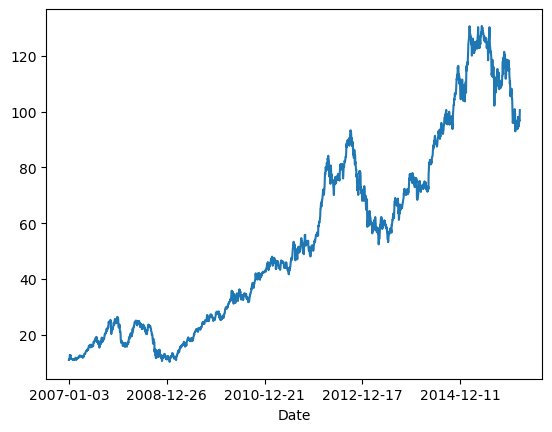

In [21]:
dfs.AAPL.plot()

<Axes: xlabel='Date'>

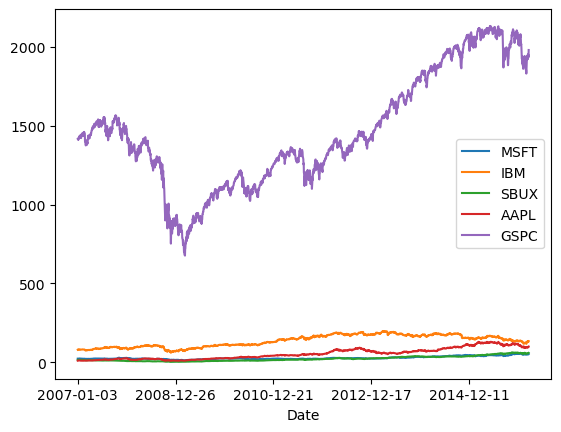

In [22]:
dfs.plot()

<Axes: xlabel='Date'>

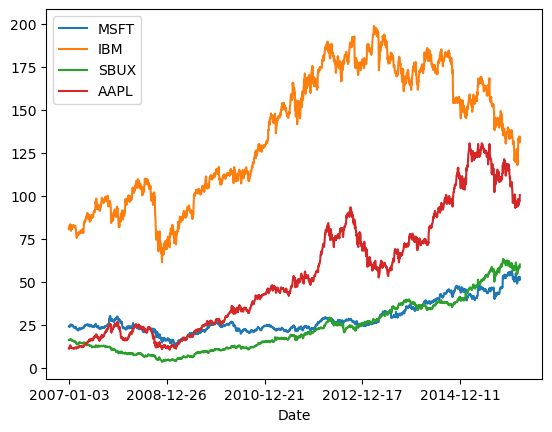

In [23]:
dfs_filtro=dfs.loc[:,("MSFT","IBM","SBUX","AAPL")] 	
dfs_filtro.plot() #posso scrivere tutte le colonne meno l'ultima dfs.iloc[:,:-1].plot() 

In [24]:
dfs["year"]=pd.to_datetime(dfs.index)
dfs

,MSFT,IBM,SBUX,AAPL,GSPC,year
Date,,,,,,
2007-01-03,23.950705,80.517962,16.149666,11.086612,1416.599976,2007-01-03
2007-01-04,23.910599,81.378851,16.167992,11.332687,1418.339966,2007-01-04
2007-01-05,23.774242,80.642129,16.099269,11.251984,1409.709961,2007-01-05
2007-01-08,24.006852,81.867244,16.039710,11.307550,1412.839966,2007-01-08
2007-01-09,24.030914,82.835742,15.970989,12.246870,1412.109985,2007-01-09
...,...,...,...,...,...,...
2016-02-24,51.360001,132.800003,58.110001,96.099998,1929.800049,2016-02-24
2016-02-25,52.099998,134.500000,58.750000,96.760002,1951.699951,2016-02-25
2016-02-26,51.299999,132.029999,58.340000,96.910004,1948.050049,2016-02-26


In [25]:
dfs_12_13=dfs.loc[(dfs.year.dt.year==2012)|(dfs.year.dt.year==2013)]
dfs_12_13=dfs_12_13.loc[:,("MSFT","IBM")]
# si poteva scrivere
#dfs.year=dfs.year.dt.year assegno alla colonna di nome year solo l'anno
#filtro1213=(dfs.year==2012)|(dfs.year==2013)
#dfs.loc[filtro1213,["MSFT","AAPL"]] loc filtra sia su rughe che colonne

<Axes: xlabel='Date'>

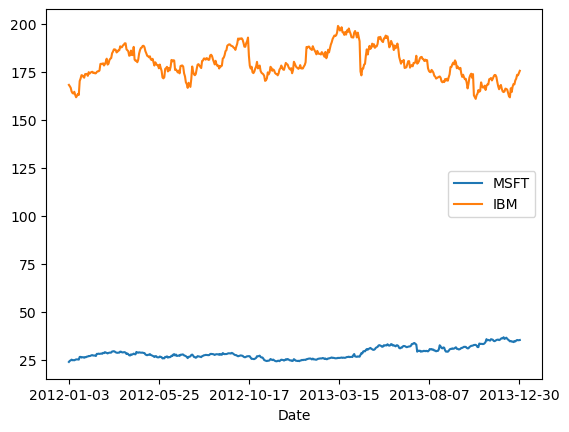

In [26]:
dfs_12_13.plot()

C:\Users\Ernesto\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='MSFT', ylabel='Count'>

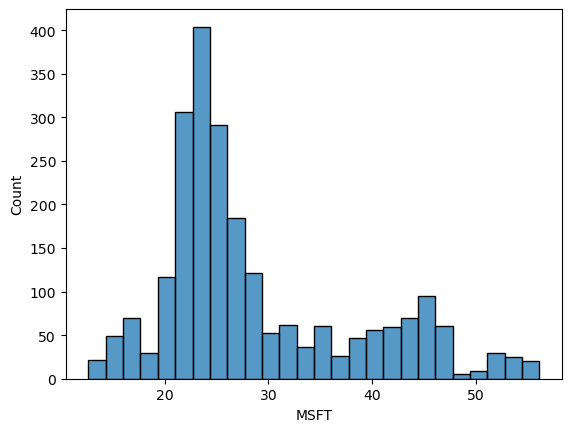

In [27]:
sns.histplot(data=dfs,x="MSFT")

<Axes: ylabel='Frequency'>

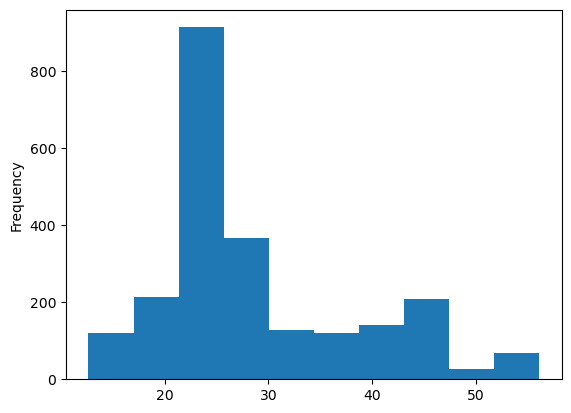

In [28]:
dfs.MSFT.plot(kind="hist")

# Esercizio 
Scarichiamo il dataset metal_bands_2017.csv da https://www.kaggle.com/datasets/mrpantherson/metal-by-nation e:
* Con Seaborn visualizziamo l'istogramma del numero dei fan delle varie band; cosa si vede? Cose ne deduciamo?
* Delle band che suonano sia Progressive che Thrash, realizziamo un barplot che mostri quanti fan ci sono in totale rispetto al paese di origine (nota: in questo caso specifico, per accedere alla colonna "style" dovremo usare ["style"] e non .style perché quest'ultimo è un metodo)
* Visualizziamo un istogramma delle date di formazione delle band (potremo dover convertire in qualche modo questo dato); si nota qualche trend?

In [29]:
percorso_attuale=os.getcwd()
path="/beginner_datasets/metal_bands_2017.csv"
dfmb=pd.read_csv(percorso_attuale+path, encoding="latin1", index_col=0)
dfmb

,band_name,fans,formed,origin,split,style
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,Amon Amarth,3054,1988,Sweden,-,Melodic death
...,...,...,...,...,...,...
4995,Atara,0,2006,France,2006,"Black,Grindcore"
4996,Avicularia,0,2003,Croatia,-,Avantgarde death
4997,Awake,0,2006,United Kingdom,2006,"Heavy,Progressive"
4998,Axatak,0,1983,Australia,1988,"Hard rock,Heavy"


In [30]:
dfmb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   band_name  5000 non-null   object
 1   fans       5000 non-null   int64 
 2   formed     5000 non-null   object
 3   origin     4992 non-null   object
 4   split      5000 non-null   object
 5   style      5000 non-null   object
dtypes: int64(1), object(5)
memory usage: 273.4+ KB


C:\Users\Ernesto\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='fans', ylabel='Count'>

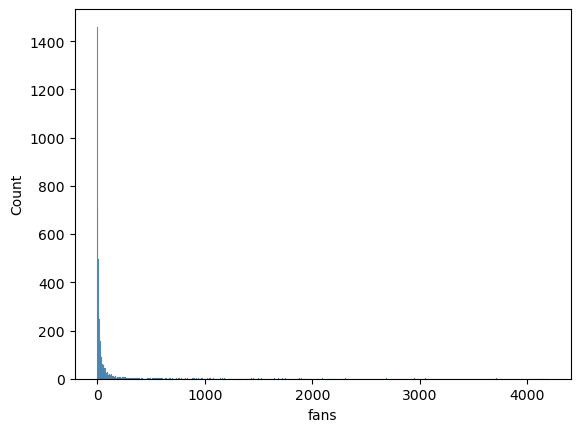

In [31]:
sns.histplot(data=dfmb, x="fans") # Si denota che la stragrande maggioranza delle band ha un numero limitato di fans 
                                           # e solo poche band ne hanno numeri signifiicativi

C:\Users\Ernesto\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='fans', ylabel='Count'>

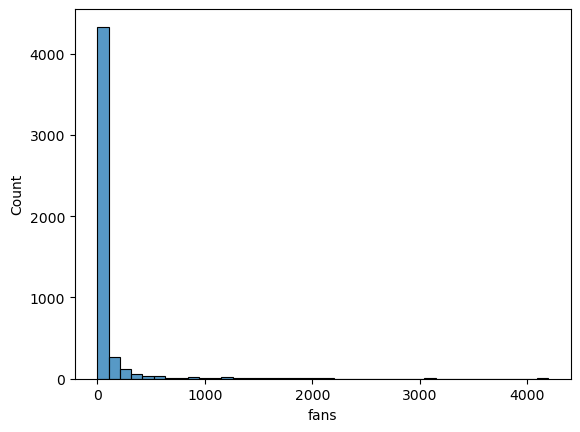

In [32]:
sns.histplot(data=dfmb, x="fans", bins=40) # Si denota che la stragrande maggioranza delle band ha un numero limitato di fans 
                                           # e solo poche band ne hanno numeri signifiicativi

<Axes: ylabel='origin'>

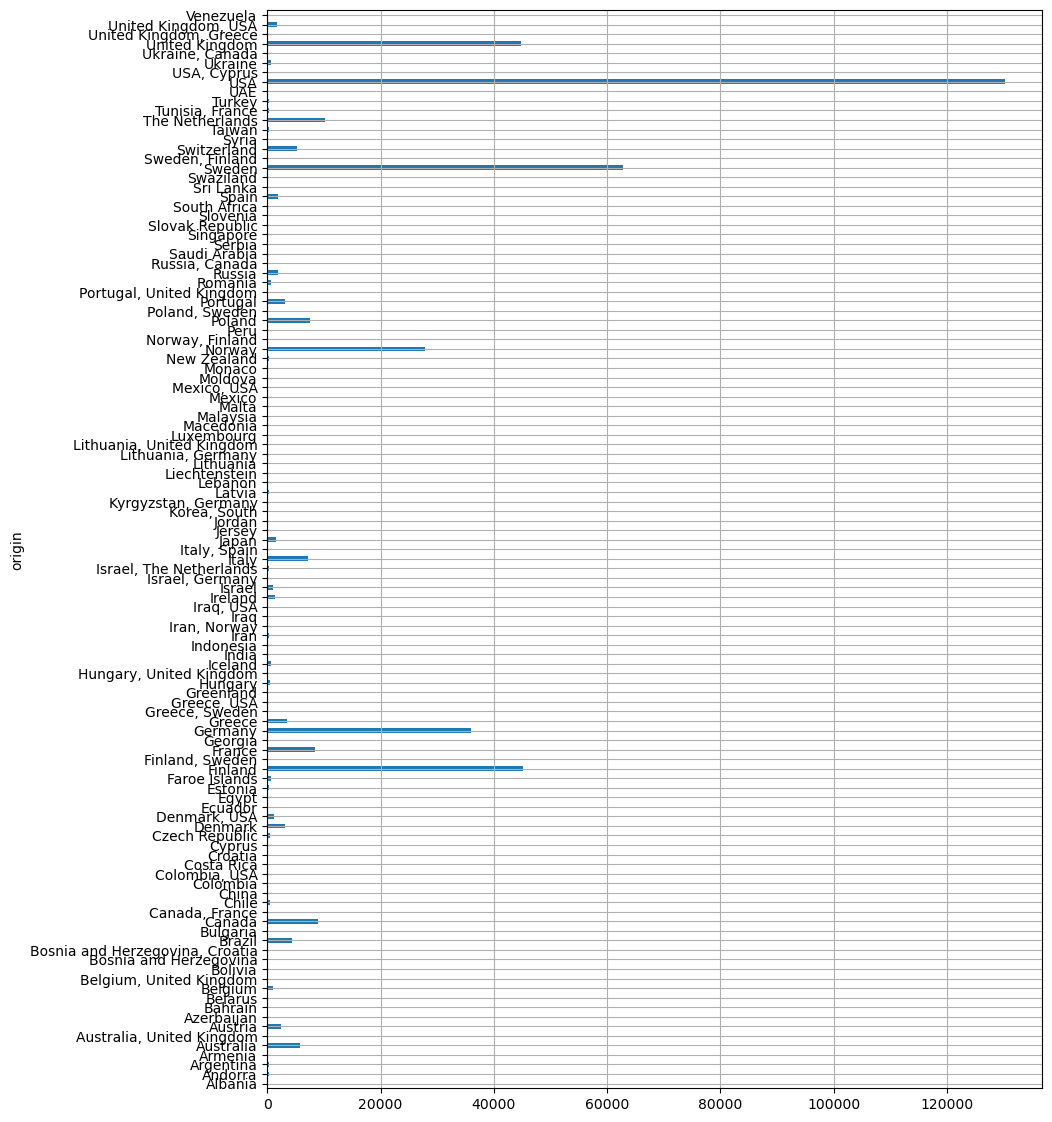

In [33]:
band_Thrash=dfmb["style"].str.contains("Thrash")
band_Progres=dfmb["style"].str.contains("Progressive")
band_T_P=(band_Thrash)|(band_Progres)
dfmb_T_P=dfmb.loc[band_T_P]
dfmbg=dfmb.groupby("origin")
fan_orig=dfmbg.fans.sum()
fan_orig.plot(kind="barh", figsize=[10,14], grid=True)

In [34]:
dfmb.formed.value_counts()

formed
2005    270
2007    265
2006    248
2008    227
2004    221
2003    217
2009    205
1998    203
2010    202
2001    189
1999    182
2002    179
2000    174
1995    169
1996    160
1997    159
1993    157
2011    153
2012    136
1994    132
2013    118
1989    102
1992    100
1990     98
2014     88
1991     77
1988     64
1985     60
1984     53
1986     53
1987     53
1983     42
1982     40
2015     36
1981     30
1979     26
1980     25
1976     17
1978     11
1977     11
1975      7
1968      7
1969      6
1972      5
2016      5
1973      4
-         4
1967      3
1974      3
1964      1
1965      1
1971      1
1970      1
Name: count, dtype: int64

In [35]:
filtro_anno=dfmb.formed.str.contains("-")
filtro_anno=~filtro_anno
dfmba=dfmb.loc[filtro_anno]
dfmba.formed=dfmba.formed.apply(int)

C:\Users\Ernesto\AppData\Local\Temp\ipykernel_9048\1856775814.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmba.formed=dfmba.formed.apply(int)


<Axes: ylabel='Frequency'>

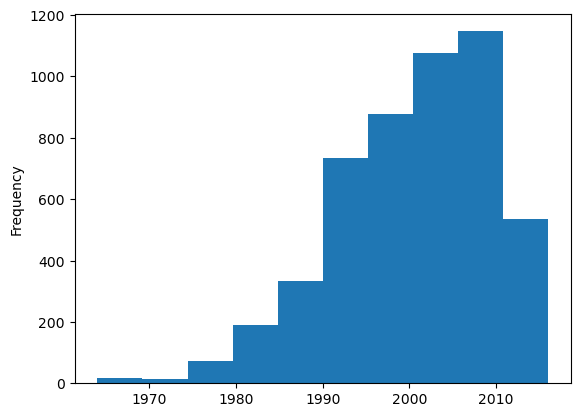

In [36]:
dfmba.formed.plot(kind="hist")

C:\Users\Ernesto\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='formed', ylabel='Count'>

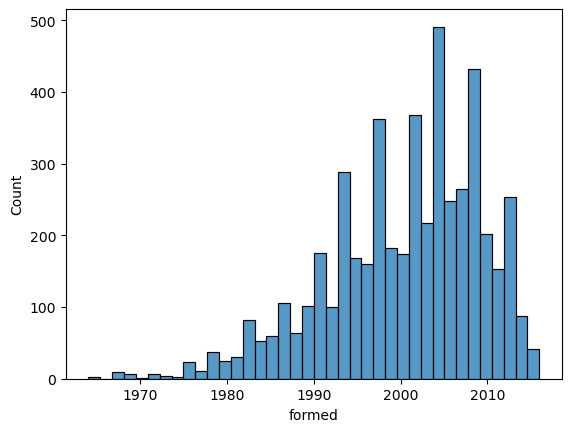

In [37]:
sns.histplot(data=dfmba,x="formed")

# Esercizio 
Scarichiamo il dataset elections.csv da https://github.com/plotly/datasets/blob/master/election.csv:
* Con un grafico a barre confrontiamo i voti totali presi dai tre candidati (come somma di tutti i distretti)
* Con un grafico a barre confrontiamo il numero di votanti per ogni distretto
* Visualizzare un grafico a barre comparativo dove si confrontano i voti presi nei primi 4 distretti per ogni candidato

In [38]:
percorso_attuale=os.getcwd()
path="/beginner_datasets/election.csv"
dfe=pd.read_csv(percorso_attuale+path)
dfe.head()

,district,Coderre,Bergeron,Joly,total,winner,result,district_id
0,101-Bois-de-Liesse,2481,1829,3024,7334,Joly,plurality,101
1,102-Cap-Saint-Jacques,2525,1163,2675,6363,Joly,plurality,102
2,11-Sault-au-Récollet,3348,2770,2532,8650,Coderre,plurality,11
3,111-Mile-End,1734,4782,2514,9030,Bergeron,majority,111
4,112-DeLorimier,1770,5933,3044,10747,Bergeron,majority,112


In [39]:
candidati=dfe.iloc[:,1:4]
candidati

,Coderre,Bergeron,Joly
0,2481,1829,3024
1,2525,1163,2675
2,3348,2770,2532
3,1734,4782,2514
4,1770,5933,3044
5,1455,3599,2316
6,3252,2521,2543
7,5456,1760,3330
8,4734,1879,2852
9,5737,958,1656


In [40]:
voti_candidati=candidati.sum()
voti_candidati

Coderre     149467
Bergeron    118637
Joly        123062
dtype: int64

<Axes: >

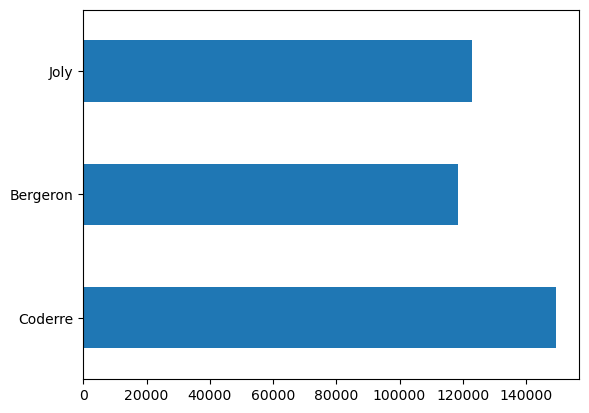

In [41]:
voti_candidati.plot(kind="barh")

<Axes: ylabel='district'>

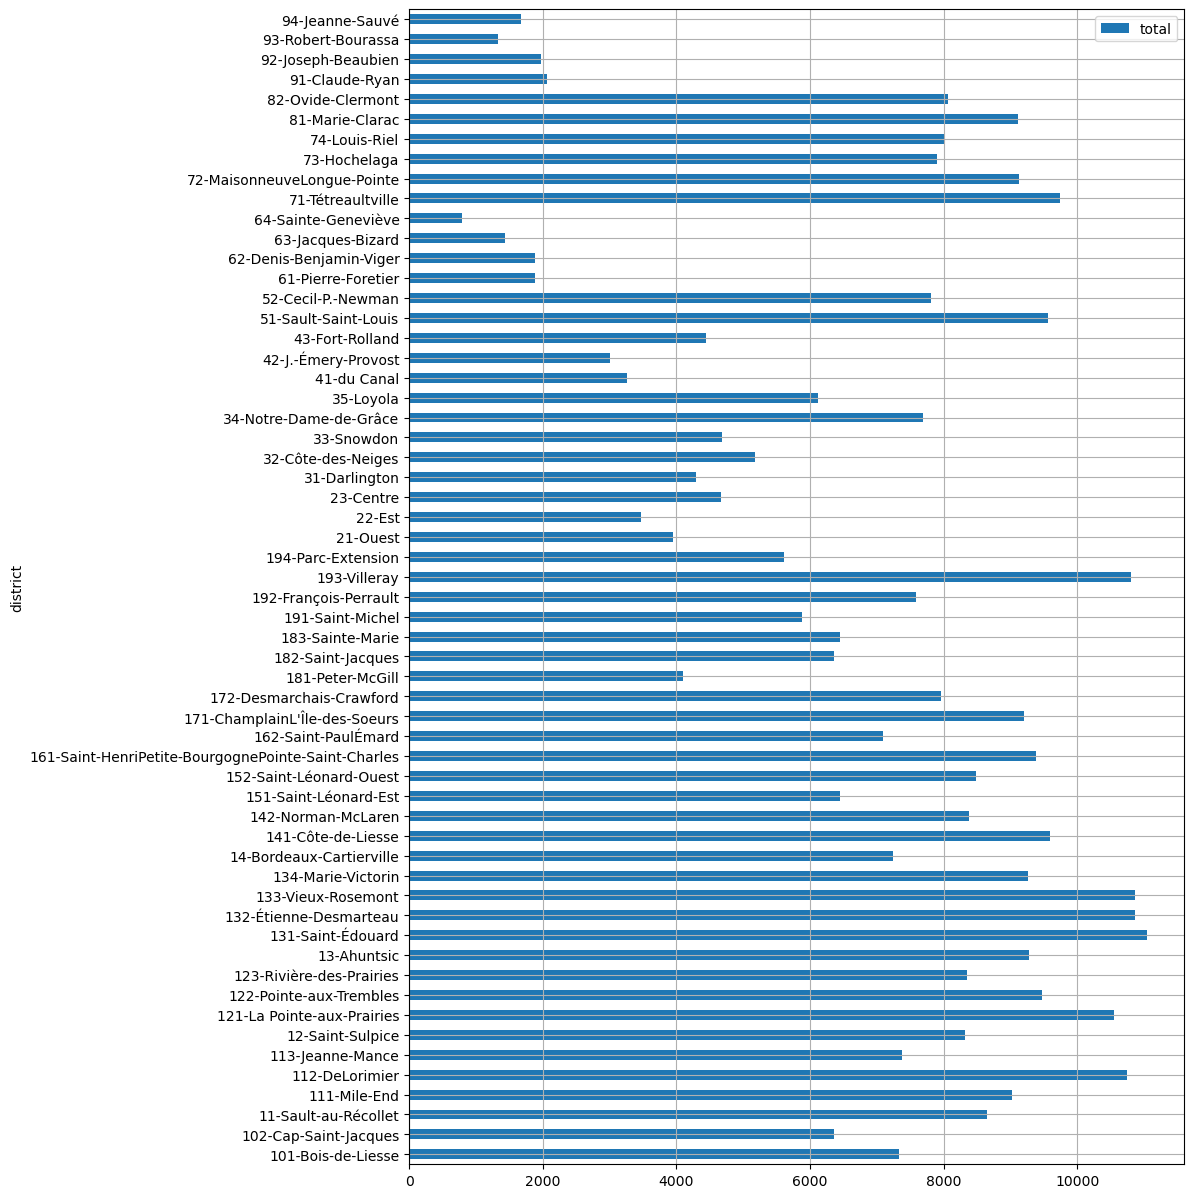

In [42]:
voto_distret=dfe.loc[:,["district","total"]]
voto_distret=voto_distret.set_index("district") 
voto_distret.plot(kind="barh",figsize=[10,15],grid=True)

<Axes: >

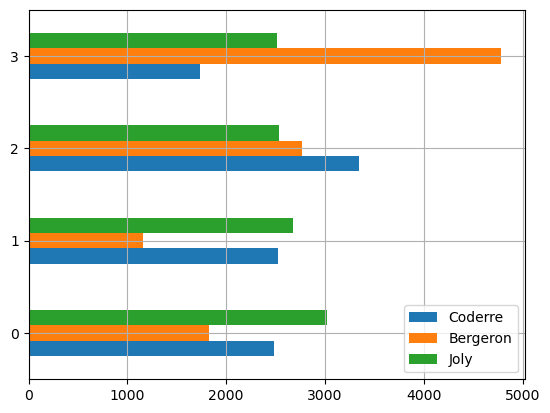

In [43]:
candist=dfe.loc[:,["district","Coderre","Bergeron","Joly"]] 	
candist.set_index("district")
candist.iloc[:4].plot(kind='barh',grid=True)

In [44]:
candist.iloc[:4]

,district,Coderre,Bergeron,Joly
0,101-Bois-de-Liesse,2481,1829,3024
1,102-Cap-Saint-Jacques,2525,1163,2675
2,11-Sault-au-Récollet,3348,2770,2532
3,111-Mile-End,1734,4782,2514


# Esercizio 
Scarichiamo i file party_in_nyc.csv dal dataset https://www.kaggle.com/datasets/somesnm/partynyc relativo a quante volte è stata chiamata la polizia per delle feste eccessivamente rumorose:
* Realizziamo un grafico che mostra quante chiamate ci sono state per ogni città per tutti i tipi di locale * Qual è il rettangolo di latitudine e longitudine considerato dal dataset?
* Quante segnalazioni sono state fatte per case private?
* Con Seaborn visualizziamo il conteggio delle segnalazioni avvenute in ogni quartiere; che succede se aggiungiamo il parametro hue="Location Type"?

In [45]:
percorso_attuale=os.getcwd()
path="/beginner_datasets/party_in_nyc.csv"
dfp=pd.read_csv(percorso_attuale+path)
dfp

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516
...,...,...,...,...,...,...,...,...
225409,2016-12-31 23:53:57,2017-01-01 00:01:41,Store/Commercial,10003.0,NEW YORK,MANHATTAN,40.730073,-73.986585
225410,2016-12-31 23:55:01,2017-01-01 02:05:06,Residential Building/House,10032.0,NEW YORK,MANHATTAN,40.833144,-73.944617
225411,2016-12-31 23:56:20,2017-01-01 13:34:00,Residential Building/House,11104.0,SUNNYSIDE,QUEENS,40.743662,-73.923067
225412,2016-12-31 23:56:41,2017-01-01 03:49:12,Residential Building/House,10040.0,NEW YORK,MANHATTAN,40.858447,-73.929279


In [46]:
dfp["Location Type"].unique()

array(['Store/Commercial', 'Residential Building/House',
       'Club/Bar/Restaurant', 'Street/Sidewalk', 'Park/Playground',
       'House of Worship'], dtype=object)

In [47]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225414 entries, 0 to 225413
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Created Date   225414 non-null  object 
 1   Closed Date    224619 non-null  object 
 2   Location Type  225414 non-null  object 
 3   Incident Zip   224424 non-null  float64
 4   City           224424 non-null  object 
 5   Borough        225414 non-null  object 
 6   Latitude       223946 non-null  float64
 7   Longitude      223946 non-null  float64
dtypes: float64(3), object(5)
memory usage: 13.8+ MB


In [48]:
dfp.isna().sum()

Created Date        0
Closed Date       795
Location Type       0
Incident Zip      990
City              990
Borough             0
Latitude         1468
Longitude        1468
dtype: int64

<Axes: xlabel='count', ylabel='City'>

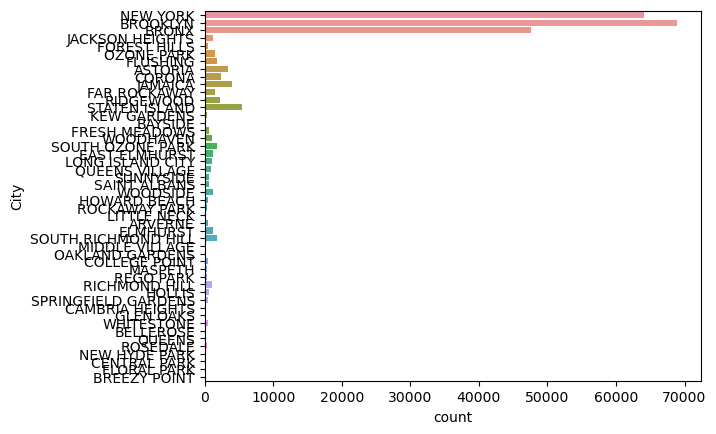

In [49]:
sns.countplot(data=dfp, y="City")

<Axes: ylabel='City'>

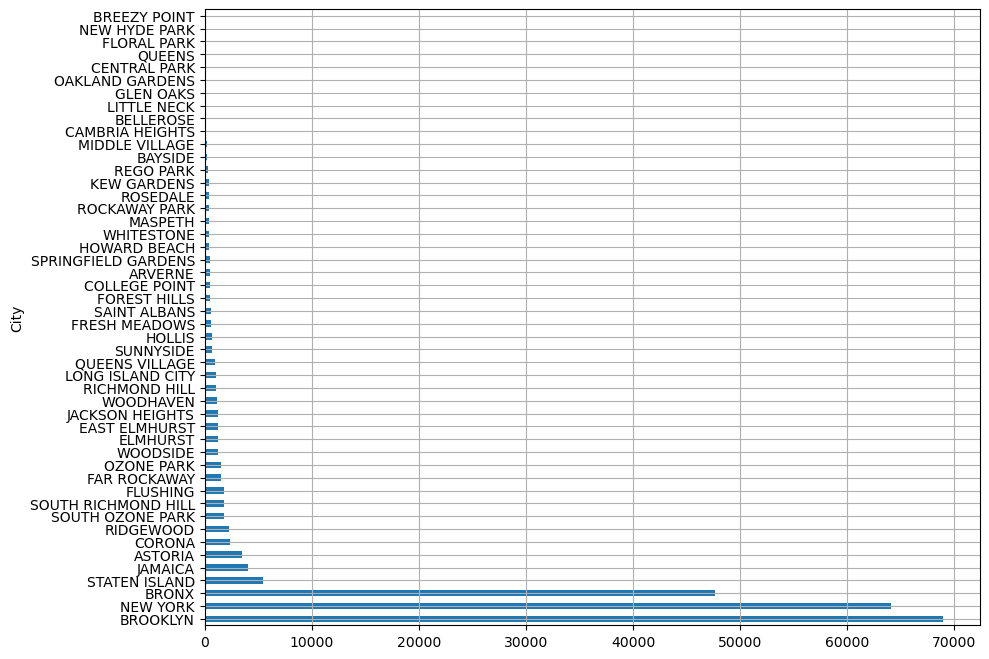

In [50]:
dfp.City.value_counts().plot(kind="barh",figsize=[10,8],grid=True)

In [51]:
dfp.describe()

,Incident Zip,Latitude,Longitude
count,224424.000000,223946.000000,223946.000000
mean,10720.020992,40.749730,-73.924889
std,576.827879,0.082068,0.063779
min,83.000000,40.498820,-74.251277
25%,10039.000000,40.684648,-73.958245
50%,10469.000000,40.739170,-73.929713
75%,11225.000000,40.829273,-73.893299
max,11697.000000,40.912178,-73.702303


In [52]:
print("latitudine:",dfp.Latitude.min(),dfp.Latitude.max(),"/n","longitudine:",dfp.Longitude.min(),dfp.Longitude.max())

latitudine: 40.498819681472185 40.91217840308113 /n longitudine: -74.25127710072611 -73.70230256557906


In [53]:
filtro_casa=dfp["Location Type"]=='Residential Building/House'
print("numero delle segnalazioni fatte per case private:",dfp.loc[filtro_casa,"Location Type"].shape)

numero delle segnalazioni fatte per case private: (146040,)


In [54]:
dfps=dfp["Location Type"].value_counts()
print("numero delle segnalazioni fatte per case private:",dfps["Residential Building/House"])

numero delle segnalazioni fatte per case private: 146040


<Axes: xlabel='count', ylabel='Borough'>

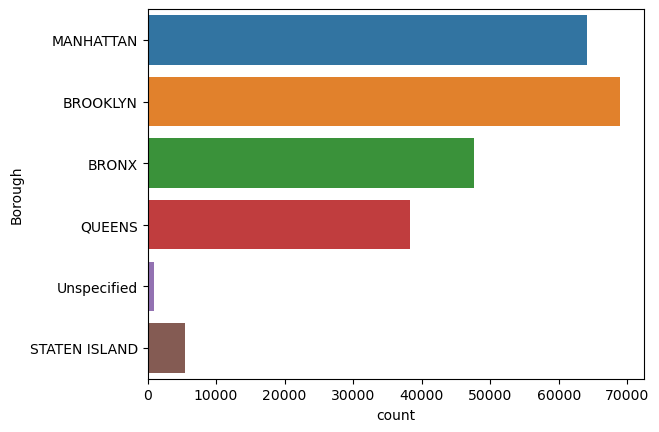

In [55]:
sns.countplot(data=dfp, y="Borough")

<Axes: xlabel='count', ylabel='Borough'>

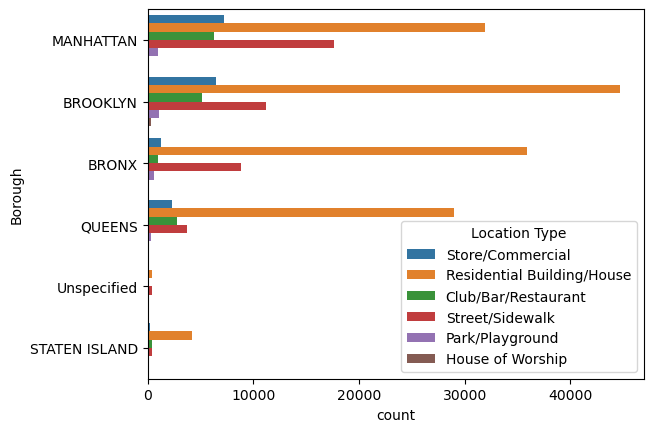

In [56]:
sns.countplot(data=dfp, y="Borough", hue="Location Type")